# The Boring Guy(s)
### Kevin Li and Owen Ford(Gaze)
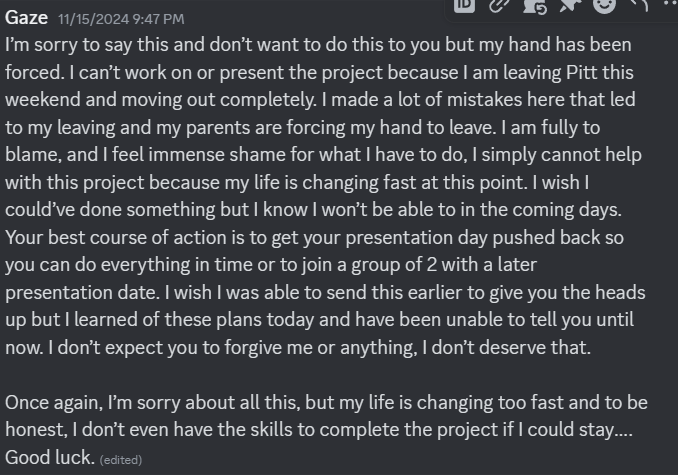

### TLDR: Owen is leaving Pitt and only told me Friday night so I did all of this myself
### (I emailed Professor Jay immediately but since it was Friday night there is not much I could do)

# Introduction 
### This is a project using 3 different datasets from [WPRDC]( https://data.wprdc.org/dataset/ ), we try to determine the best neighborhood in Pittsburgh. Owen came up with the submetrics and I found the datasets that correspond to them. He also suggested Homeless Rate but I could not find that. We decided to first analyze the individual submetrics first then merge them at the end.

## The 3 submetrics are:
### Household Income: In the year 2014-2015, total of year. [DATA]( https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/b119be7e-1c70-4bbe-bf34-2056fef533ec)

### Unemployment Rate: In the year 2014, percentage of population. [DATA]( https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2014-miscellaneous-data/resource/d53bfc16-9518-4c5b-b102-847654dabe21)

### Poverty Rate: In the year of 2014, percentage of population. [DATA]( https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2014-miscellaneous-data/resource/7996d143-c155-466e-8414-115f74997dd7)

## Household Income

In [92]:
##Household Income
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filed = pd.read_csv("HouseholdIncome.csv")
file = pd.read_csv("EmploymentStatus.csv")
files = pd.read_csv("PovertyStatus.csv")
data = pd.DataFrame()

In [93]:
neighborhoods = []
incomes = []
for index, row in filed.iterrows():
    neighborhood = row['Neighborhood']
    income = 5000 * float(row['Estimate; Total: - Less than $10,000'])
    income += 10000 * float(row['Estimate; Total: - $10,000 to $14,999'])
    income += 15000 * float(row['Estimate; Total: - $15,000 to $19,999'])
    income += 20000 * float(row['Estimate; Total: - $20,000 to $24,999'])
    income += 25000 * float(row['Estimate; Total: - $25,000 to $29,999'])
    income += 30000 * float(row['Estimate; Total: - $30,000 to $34,999'])
    income += 35000 * float(row['Estimate; Total: - $35,000 to $39,999'])
    income += 40000 * float(row['Estimate; Total: - $40,000 to $44,999'])
    income += 45000 * float(row['Estimate; Total: - $45,000 to $49,999'])
    income += 50000 * float(row['Estimate; Total: - $50,000 to $59,999'])
    income += 60000 * float(row['Estimate; Total: - $60,000 to $74,999'])
    income += 75000 * float(row['Estimate; Total: - $75,000 to $99,999'])
    income += 100000 * float(row['Estimate; Total: - $100,000 to $124,999'])
    income += 125000 * float(row['Estimate; Total: - $125,000 to $149,999'])
    income += 150000 * float(row['Estimate; Total: - $150,000 to $199,999'])
    income += 200000 * float(row['Estimate; Total: - $200,000 or more'])
    income /= float(row['Estimate; Total:'])
    neighborhoods.append(neighborhood)
    incomes.append(income)

## Unemployment Rate

In [4]:
unemployment = []
for index, row in file.iterrows():
    population = float(row['Estimate; Total:'])
    if population == 0:
        population = 1
    unemployed = float(row['Estimate; In labor force: - Civilian labor force: - Unemployed'])
    unemployed += float(row['Estimate; Not in labor force'])
    percentage = unemployed / population
    unemployment.append(percentage)

## Poverty Rate

In [113]:
poverty = []
for index, row in file.iterrows():
    population = float(row['Estimate; Total:'])
    if population == 0:
        population = 1
    pover = float(row.iloc[5])
    ## column title is population past 12 months below poverty line, but I couldn't get row['column name'] to work with it.
    povert = pover / population
    poverty.append(povert)

## Merging 

In [94]:
data['Neighborhood'] = neighborhoods
data['Average Income'] = incomes
data['Unemployment Rate'] = unemployment
data['Poverty Rate'] = poverty
data.head(5)

,Neighborhood,Average Income,Unemployment Rate,Poverty Rate
0,Allegheny Center,41603.448276,0.416918,0.618328
1,Allegheny West,75582.191781,0.338323,0.688623
2,Allentown,32581.852198,0.562435,0.564516
3,Arlington,44564.907275,0.374369,0.699495
4,Arlington Heights,14756.944444,0.620853,0.421801


## Merged Metric: top place of each metric gets score of amount of neighborhoods listed in that metric, second gets that score - 1, etc...

In [85]:
scores = dict()

## First, getting scores by Average Income

In [86]:
data = data.sort_values(by = 'Average Income', ascending = False)
data.head(5)

,Neighborhood,Average Income,Unemployment Rate,Poverty Rate
76,Squirrel Hill North,103771.513353,0.460594,0.568729
80,Strip District,96509.615385,0.109422,0.898176
63,Point Breeze,96468.830060,0.289114,0.732702
66,Regent Square,86785.714286,0.322115,0.723558
16,Central Business District,78666.158537,0.462239,0.591636


### Graph

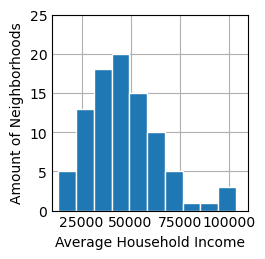

In [73]:
plt.style.use('_mpl-gallery')

income = []
# make data
for index, row in data.iterrows():
    income.append(row['Average Income'])

# plot:
fig, ax = plt.subplots()

ax.hist(income, bins=10, edgecolor="white")

ax.set(xlim=(10000, 110000), xlabel = "Average Household Income",
       ylim=(0, 25), ylabel = "Amount of Neighborhoods")

plt.show()

## Each Bar is a $10000 interval

In [87]:
scored = 91
for index, row in data.iterrows():
    neighborhood = row['Neighborhood']
    scores[neighborhood] = scored
    scored -= 1
print(scores)

{'Squirrel Hill North': 91, 'Strip District': 90, 'Point Breeze': 89, 'Regent Square': 88, 'Central Business District': 87, 'Allegheny West': 86, 'Squirrel Hill South': 85, 'North Shore': 84, 'Fairywood': 83, 'Highland Park': 82, 'South Shore': 81, 'Swisshelm Park': 80, 'New Homestead': 79, 'Duquesne Heights': 78, 'Summer Hill': 77, 'Greenfield': 76, 'Shadyside': 75, 'Banksville': 74, 'Chateau': 73, 'South Side Flats': 72, 'Stanton Heights': 71, 'Perry North': 70, 'Westwood': 69, 'Brookline': 68, 'Brighton Heights': 67, 'Central Lawrenceville': 66, 'Bon Air': 65, 'South Side Slopes': 64, 'Troy Hill': 63, 'Central Northside': 62, 'Point Breeze North': 61, 'Lincoln Place': 60, 'Morningside': 59, 'Mount Washington': 58, 'East Carnegie': 57, 'Overbrook': 56, 'Polish Hill': 55, 'Windgap': 54, 'Bloomfield': 53, 'Manchester': 52, 'Beechview': 51, 'Mt. Oliver': 50, 'Chartiers City': 49, 'Lower Lawrenceville': 48, 'Arlington': 47, 'Crafton Heights': 46, 'Ridgemont': 45, 'Carrick': 44, 'Oakwood'

## Next, getting scores by lowest Unemployment Rate

In [88]:
data = data.sort_values(by = 'Unemployment Rate', ascending = True)
data.head(5)

,Neighborhood,Average Income,Unemployment Rate,Poverty Rate
21,Chateau,60000.000000,0.000000,0.000000
71,South Shore,67500.000000,0.000000,1.000000
57,North Shore,69188.311688,0.078212,0.921788
80,Strip District,96509.615385,0.109422,0.898176
31,Fairywood,68598.130841,0.196097,0.830855


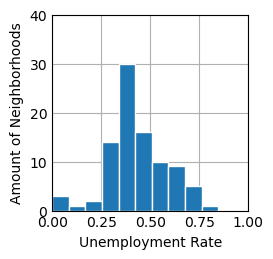

In [76]:
plt.style.use('_mpl-gallery')

income = []
# make data
for index, row in data.iterrows():
    income.append(row['Unemployment Rate'])

# plot:
fig, ax = plt.subplots()

ax.hist(income, bins=10, edgecolor="white")

ax.set(xlim=(0, 1), xlabel = "Unemployment Rate",
       ylim=(0, 40), ylabel = "Amount of Neighborhoods")

plt.show()

## Each bar is about 1/12 interval

In [89]:
scored = 91
for index, row in data.iterrows():
    neighborhood = row['Neighborhood']
    scores[neighborhood] += scored
    scored -= 1
print(scores)

{'Squirrel Hill North': 123, 'Strip District': 178, 'Point Breeze': 173, 'Regent Square': 167, 'Central Business District': 118, 'Allegheny West': 159, 'Squirrel Hill South': 134, 'North Shore': 173, 'Fairywood': 170, 'Highland Park': 143, 'South Shore': 171, 'Swisshelm Park': 135, 'New Homestead': 127, 'Duquesne Heights': 156, 'Summer Hill': 151, 'Greenfield': 156, 'Shadyside': 146, 'Banksville': 139, 'Chateau': 164, 'South Side Flats': 147, 'Stanton Heights': 117, 'Perry North': 120, 'Westwood': 122, 'Brookline': 130, 'Brighton Heights': 123, 'Central Lawrenceville': 135, 'Bon Air': 146, 'South Side Slopes': 122, 'Troy Hill': 115, 'Central Northside': 121, 'Point Breeze North': 129, 'Lincoln Place': 100, 'Morningside': 123, 'Mount Washington': 118, 'East Carnegie': 142, 'Overbrook': 97, 'Polish Hill': 138, 'Windgap': 92, 'Bloomfield': 129, 'Manchester': 91, 'Beechview': 98, 'Mt. Oliver': 120, 'Chartiers City': 112, 'Lower Lawrenceville': 120, 'Arlington': 104, 'Crafton Heights': 97, 

## Lastly, getting Scores by Poverty Rate

In [105]:
data = data.sort_values(by = 'Poverty Rate', ascending = True)
data.head(5)

,Neighborhood,Average Income,Unemployment Rate,Poverty Rate
21,Chateau,60000.000000,0.000000,0.000000
35,Glen Hazel,17863.070539,0.847487,0.152513
10,Bluff,40437.500000,0.717863,0.318364
49,Marshall-Shadeland,39584.664537,0.687533,0.357306
56,North Oakland,35686.406460,0.652471,0.407150


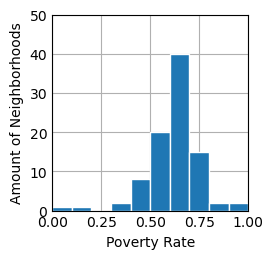

In [106]:
plt.style.use('_mpl-gallery')

income = []
# make data
for index, row in data.iterrows():
    income.append(row['Poverty Rate'])

# plot:
fig, ax = plt.subplots()

ax.hist(income, bins=10, edgecolor="white")

ax.set(xlim=(0, 1), xlabel = "Poverty Rate",
       ylim=(0, 50), ylabel = "Amount of Neighborhoods")

plt.show()

In [91]:
scored = 91
for index, row in data.iterrows():
    neighborhood = row['Neighborhood']
    scores[neighborhood] += scored
    scored -= 1
print(scores)

{'Squirrel Hill North': 186, 'Strip District': 181, 'Point Breeze': 183, 'Regent Square': 180, 'Central Business District': 179, 'Allegheny West': 187, 'Squirrel Hill South': 185, 'North Shore': 175, 'Fairywood': 174, 'Highland Park': 173, 'South Shore': 172, 'Swisshelm Park': 171, 'New Homestead': 181, 'Duquesne Heights': 170, 'Summer Hill': 166, 'Greenfield': 172, 'Shadyside': 173, 'Banksville': 179, 'Chateau': 255, 'South Side Flats': 165, 'Stanton Heights': 163, 'Perry North': 139, 'Westwood': 165, 'Brookline': 152, 'Brighton Heights': 158, 'Central Lawrenceville': 161, 'Bon Air': 154, 'South Side Slopes': 161, 'Troy Hill': 153, 'Central Northside': 150, 'Point Breeze North': 140, 'Lincoln Place': 149, 'Morningside': 160, 'Mount Washington': 143, 'East Carnegie': 148, 'Overbrook': 154, 'Polish Hill': 145, 'Windgap': 140, 'Bloomfield': 146, 'Manchester': 146, 'Beechview': 142, 'Mt. Oliver': 144, 'Chartiers City': 144, 'Lower Lawrenceville': 129, 'Arlington': 124, 'Crafton Heights': 

### I Print out the dictionaries to make sure they are in the right ballpark of values
# Now, to find the winner

In [98]:
data2 = pd.DataFrame()
data2['Neighborhood'] = scores.keys()
data2['Score'] = scores.values()
data2.head(5)

,Neighborhood,Score
0,Squirrel Hill North,186
1,Strip District,181
2,Point Breeze,183
3,Regent Square,180
4,Central Business District,179


In [101]:
data2 = data2.sort_values(by = 'Score', ascending = False)
data2.head(6)

,Neighborhood,Score
18,Chateau,255
5,Allegheny West,187
0,Squirrel Hill North,186
6,Squirrel Hill South,185
2,Point Breeze,183
12,New Homestead,181


## You know, Chateau looks a bit like an outlier with its perfectly 0 poverty rate and unemployment rate.
### If you flip through the csv files, you can see that Chateau has about only 3 people living there somehow.
### So, we are going to exclude it from this analysis.

## Lets see how everyone scored.

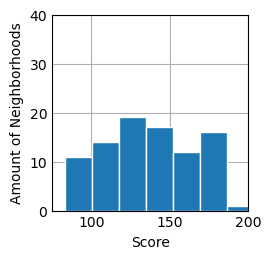

138.0


In [111]:
plt.style.use('_mpl-gallery')

income = []
# make data
for index, row in data2.iterrows():
    income.append(row['Score'])

# plot:
fig, ax = plt.subplots()

ax.hist(income, bins=10, edgecolor="white")

ax.set(xlim=(75, 200), xlabel = "Score",
       ylim=(0, 40), ylabel = "Amount of Neighborhoods")

plt.show()
print(data2['Score'].mean())

## The average score was 138.

## Now with everything we listed, the title of Best Neighborhood of Pittsburgh goes to...
# Allegheny West! Congratulations
(I wanted one of the Squirrel Hill districts to win)

## Conclusion
### Kevin Li:

- I feel that the three data sets we choose were somewhat boring. Owen choose them initially because he decided to take on two and thus I let him pick them.
- On the other hand, I haven't been to every single neighborhood in Pittsburgh yet so it would be biased of me to pick out one right now. But if I had to, it would be Robinson or Squirrel Hill. I would pick Robinson simply because of all the commerce there. I would pick Squirrel Hill because my friend lives there and I've come to know the place really well. I was surprised that both Squirrel Hill districts came so close to the top actually. Them taking number 2 and 3 was a big surprise.
- For the data part, I feel that the few metrics we picked are ones that can really determine mainly the economic status of different neighborhoods. Usually, better economy means more money flowing around, more tax payer dollars, and more security (somewhat).

### Owen Ford:
- N/A